## Таблиця виконання процесів

| Етап | Завдання                        | Основні дії                                                                           | Вхідні дані                    | Вихідні дані                         | Примітки                    |
| ---- | ---------------------------------- | ------------------------------------------------------------------------------------- | ------------------------------ | ------------------------------------ | --------------------------- |
| 1    | Вибір датасету                     | Обрати MNIST або інший подібний                                                       | -                              | Назва датасету                       | Обмеження: ≤ 80x80 px       |
| 2    | Завантаження та валідація датасету | Зчитати з API або файлів                                                              | Назва датасету                 | X (зображення), y (мітки)            | -                           |
| 3    | Попередня обробка зображень        | - Нормалізація<br>- Ресайз<br>- Розгортання векторами<br>- One-hot encoding для міток | X, y                           | X\_train, X\_test, y\_train, y\_test | -                           |
| 4    | Побудова кастомної моделі          | Створення багатошарової NN без CNN                                                    | X\_train.shape, y\_train.shape | Модель                               | Лінійна NN (Dense only)     |
| 5    | Компіляція моделі                  | Вказати loss, optimizer, метрики                                                      | Модель                         | Готова модель                        | -                           |
| 6    | Навчання моделі                    | Запустити `fit`, вказати параметри навчання                                           | X\_train, y\_train             | Історія навчання (history)           | З валідацією на X\_test     |
| 7    | Візуалізація навчання              | Побудова графіків втрат і точності                                                    | history                        | Графіки                              | Діагностика процесу         |
| 8    | Оцінка якості моделі               | Розрахунок метрик на тестових даних                                                   | Модель, X\_test, y\_test       | Accuracy, loss                       | -                           |
| 9    | Візуалізація прогнозів             | Показати 10 випадкових прикладів з передбаченнями                                     | Модель, X\_test                | Зображення, підписи                  | Контроль якості результатів |


## Опис датасету
| Атрибут           | Опис                                                                     |
| ----------------- | ------------------------------------------------------------------------ |
| Назва             | MNIST (Modified National Institute of Standards and Technology database) |
| Тип               | Зображення (чорно-білі)                                                  |
| Кількість класів  | 10 (цифри 0–9)                                                           |
| Кількість зразків | 70 000 (60 000 train + 10 000 test)                                      |
| Розмір зображень  | 28 x 28 пікселів                                                         |
| Канали            | 1 (градації сірого)                                                      |
| Формат зберігання | NumPy масиви або оригінальні IDX файли                                   |
| Джерело           | TensorFlow Datasets, Keras Datasets, Kaggle                              |
| Складність задачі | Базова, підходить для тестування архітектур                              |
| Тип задачі        | Багатокласова класифікація                                               |
| Приклади класів   | 0, 1, 2, ..., 9                                                          |
| Додатково         | Є шумові приклади, недосконалі форми цифр                                |


*! (Подалі, як і в інших домашках - я документую певну інформацію для себе - щоб не витрачати час додатково це робити в Obsidian) !*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

plt.style.use('seaborn-v0_8-darkgrid')


In [ ]:
# Завантаження даних
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("After preprocess:")
print("  X_train.shape =", X_train.shape)
print("  X_test.shape  =", X_test.shape)

# One‑hot кодування міток
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)


After preprocess:
  X_train.shape = (60000, 28, 28)
  X_test.shape  = (10000, 28, 28)


In [ ]:
# Створення моделі
model = Sequential([
    Flatten(input_shape=(28,28)), # підготовка зображен
    Dense(128, activation='relu'), # нм навчається бачити патерни та ознаки
    Dense(64, activation='relu'), # комбінує ці ознаки у складніші
    Dense(10, activation='softmax') # видає 10 чисел які інтерпретуються як ймовірності класів
])

model.compile(optimizer='adam', # метод коригування ваг
              loss='categorical_crossentropy', # задача класифікації
              metrics=['accuracy']) # логи моніторингу

model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

| Layer (type)      | Output Shape | Param # | Як рахується                                                                  |
| ----------------- | ------------ | ------- | ----------------------------------------------------------------------------- |
| **flatten**       | (None, 784)  | 0       | Не має ваг: просто перетворює 28×28→784 (None означає “будь‑який batch size”) |
| **dense**         | (None, 128)  | 100 480 | (784 входи × 128 нейронів) + 128 зміщень = 100 352 + 128 = **100 480**        |
| **dense\_1**      | (None, 64)   | 8 256   | (128 входи × 64 нейрона) + 64 зміщень = 8 192 + 64 = **8 256**                |
| **dense\_2**      | (None, 10)   | 650     | (64 входи × 10 нейронів) + 10 зміщень = 640 + 10 = **650**                    |
| **Total params**  | —            | 109 386 | **100 480 + 8 256 + 650**                                                     |
| **Trainable**     | —            | 109 386 | Всі параметри — ваги і біаси — підлягають оновленню                           |
| **Non-trainable** | —            | 0       | Параметрів, які не навчаються (наприклад, статистики BatchNorm), тут немає    |


In [33]:
# Навчання
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=1
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7828 - loss: 7.8014 - val_accuracy: 0.9108 - val_loss: 0.8214
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9246 - loss: 0.5902 - val_accuracy: 0.9259 - val_loss: 0.4708
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9421 - loss: 0.3110 - val_accuracy: 0.9360 - val_loss: 0.3655
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9546 - loss: 0.2172 - val_accuracy: 0.9488 - val_loss: 0.3217
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1434 - val_accuracy: 0.9465 - val_loss: 0.2844
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9672 - loss: 0.1261 - val_accuracy: 0.9491 - val_loss: 0.2704
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.1023 - val_accuracy: 0.9553 - val_loss: 0.2242
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9736 - loss: 0.0986 - val_accuracy: 0.

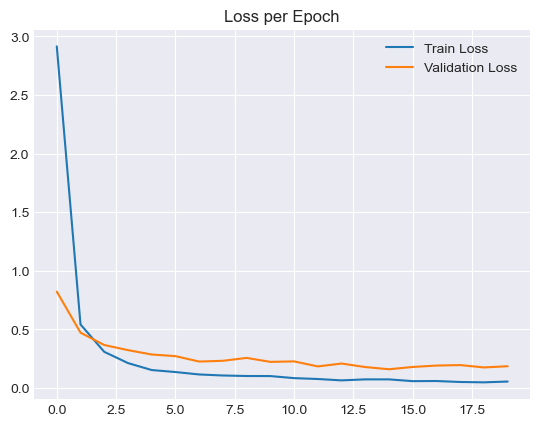

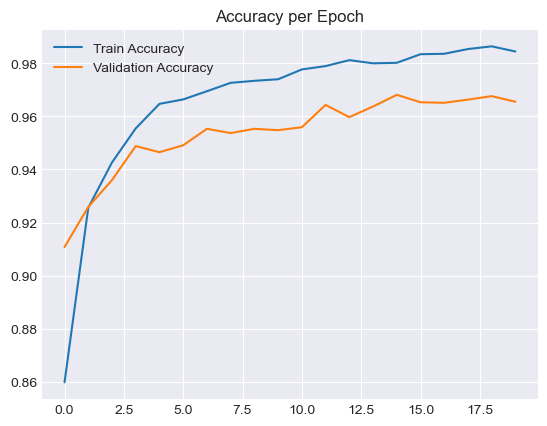

In [34]:
# Візуалізація метрик
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


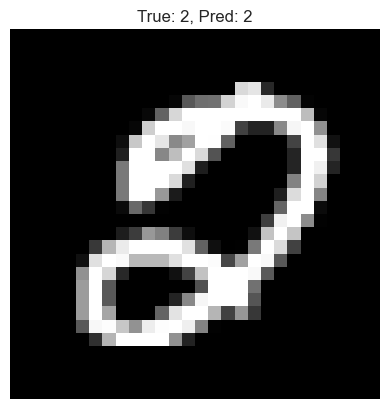

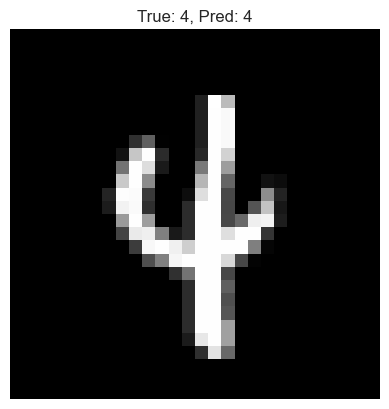

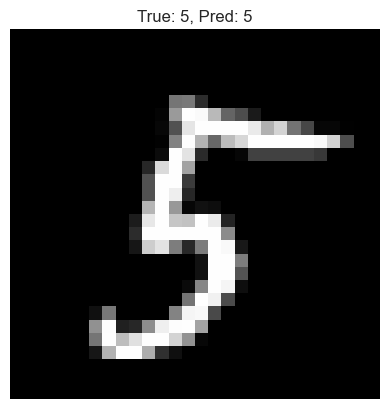

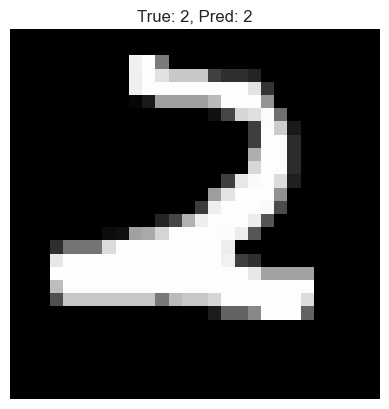

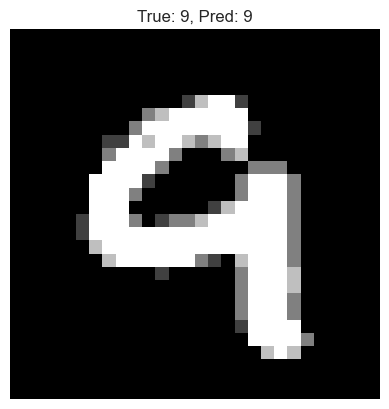

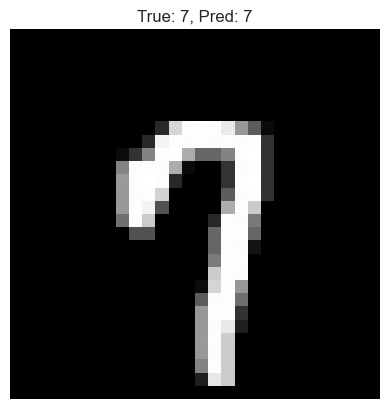

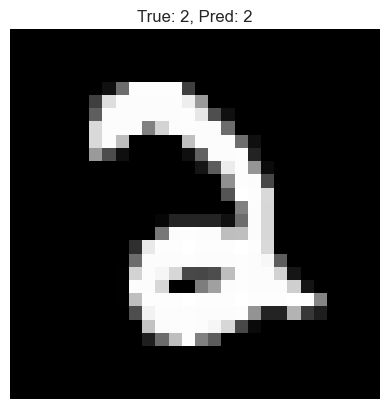

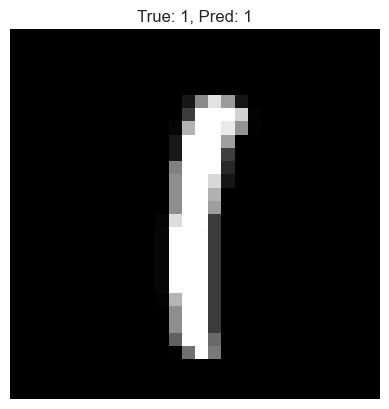

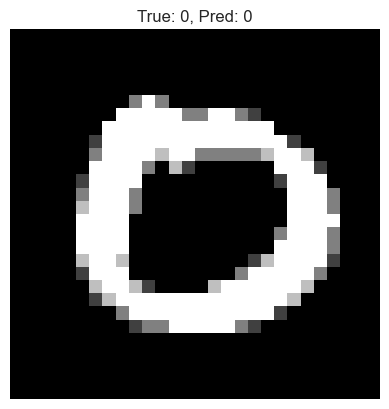

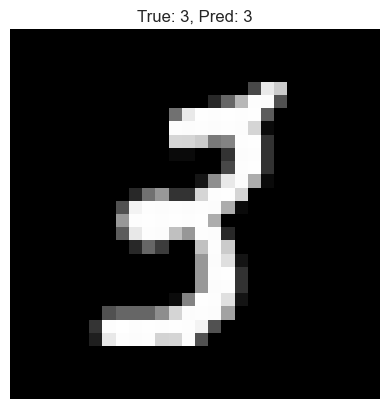

In [ ]:
# Візуалізація прогнозів
indices = np.random.choice(range(X_test.shape[0]), 10)
X_sample = X_test[indices]
y_true = np.argmax(y_test[indices], axis=1)
y_pred = np.argmax(model.predict(X_sample), axis=1)

X_sample_images = X_sample.reshape(X_sample.shape[0], 28, 28)

for i in range(10):
    plt.imshow(X_sample_images[i], cmap='gray')
    plt.title(f'True: {y_true[i]}, Pred: {y_pred[i]}')
    plt.axis('off')
    plt.show()
